In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
# Assuming the dataset is in a CSV file named 'company_dataset.csv'
df = pd.read_csv('Company_Data.csv')

df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# Display the first few rows of the dataset
print(df.head())


   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  


In [4]:

# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


## Preprocessing the Data

In [5]:
# Convert the 'Sales' variable into a categorical variable
df['Sales_Category'] = pd.cut(df['Sales'], bins=[-float('inf'), 10, 20, float('inf')], labels=['Low', 'Medium', 'High'])



In [6]:
# Drop the original 'Sales' variable
df = df.drop('Sales', axis=1)



In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['ShelveLoc'] = label_encoder.fit_transform(df['ShelveLoc'])
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])
df['Sales_Category'] = label_encoder.fit_transform(df['Sales_Category'])



In [8]:
# Split the data into features (X) and target variable (y)
X = df.drop('Sales_Category', axis=1)
y = df['Sales_Category']

X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [9]:
y

0      0
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    0
Name: Sales_Category, Length: 400, dtype: int32

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
X_train


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
3,117,100,4,466,97,2,55,14,1,1
18,110,110,0,408,68,1,46,17,0,1
202,121,78,4,413,130,0,46,10,0,1
250,137,105,10,435,156,1,72,14,1,1
274,135,93,2,67,119,2,34,11,1,1
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,2,58,17,0,1
106,102,33,0,217,139,2,70,18,0,0
270,119,26,0,284,89,1,26,10,1,0
348,132,102,20,459,107,1,49,11,1,1


In [12]:
X_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
209,98,21,11,326,90,0,76,11,0,1
280,121,86,10,496,145,0,51,10,1,1
33,114,38,13,317,128,1,50,16,1,1
210,125,41,2,357,123,0,47,14,0,1
93,145,30,0,67,104,2,55,17,1,0
...,...,...,...,...,...,...,...,...,...,...
246,120,56,20,266,90,0,78,18,1,1
227,113,64,10,68,101,2,57,16,1,1
369,135,100,22,463,122,2,36,14,1,1
176,138,107,9,480,154,2,47,11,0,1


In [13]:
y_train

3      0
18     1
202    0
250    0
274    0
      ..
71     0
106    0
270    1
348    1
102    0
Name: Sales_Category, Length: 320, dtype: int32

In [14]:
y_test

209    0
280    0
33     0
210    0
93     0
      ..
246    0
227    0
369    1
176    0
289    0
Name: Sales_Category, Length: 80, dtype: int32

## Build and train random forest model

In [15]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



In [16]:
# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)



In [18]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)



In [19]:
# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8125
Confusion Matrix:
[[60  1]
 [14  5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        61
           1       0.83      0.26      0.40        19

    accuracy                           0.81        80
   macro avg       0.82      0.62      0.64        80
weighted avg       0.82      0.81      0.77        80



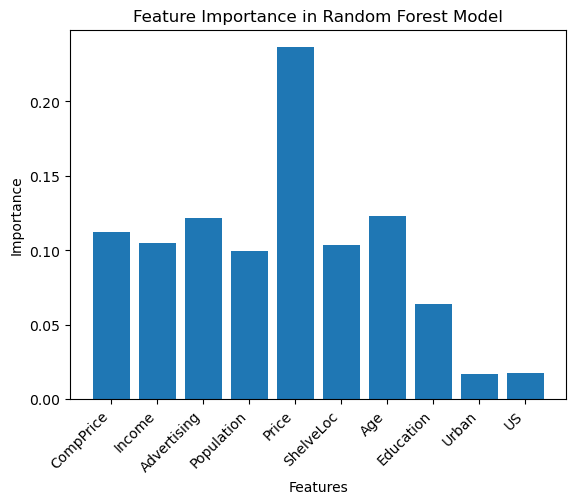

In [20]:
import matplotlib.pyplot as plt

# Extract feature importances from the model
feature_importances = rf_model.feature_importances_

# Create a bar chart for feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=45, ha='right')
plt.show()


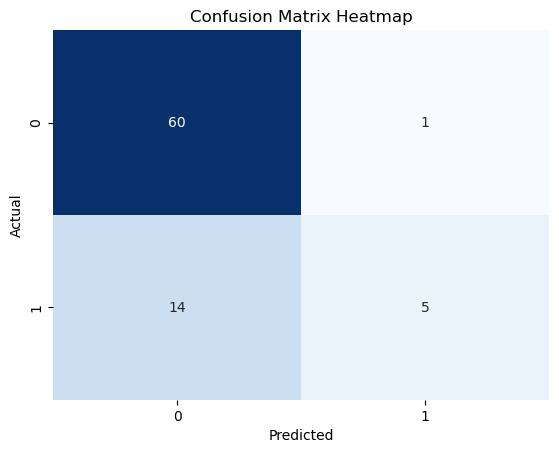

In [21]:
import seaborn as sns

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


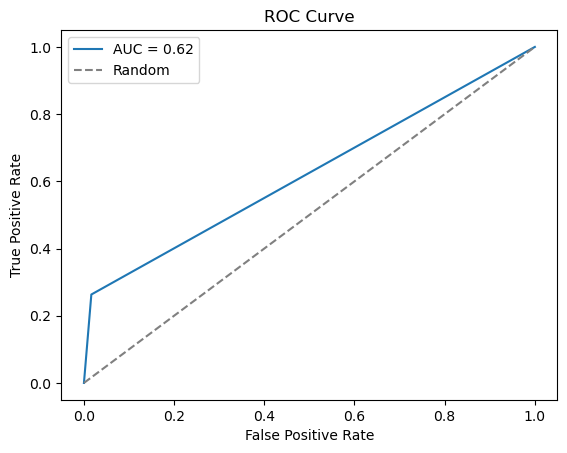

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


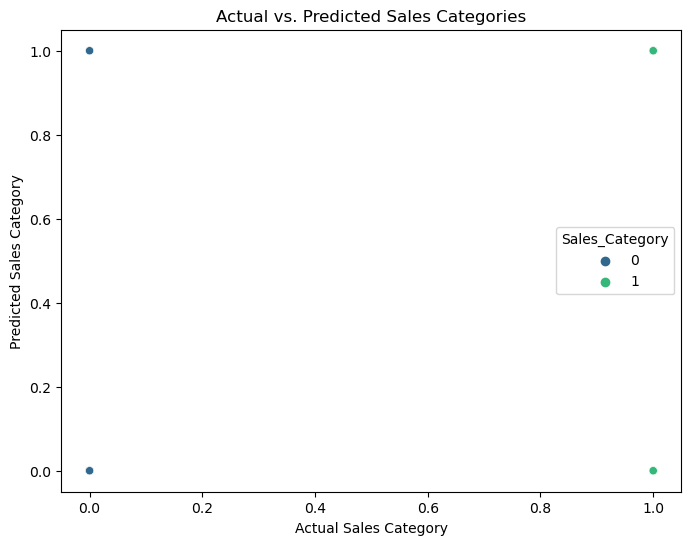

In [23]:
import seaborn as sns

# Create a scatter plot for actual vs. predicted sales categories
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='viridis')
plt.xlabel('Actual Sales Category')
plt.ylabel('Predicted Sales Category')
plt.title('Actual vs. Predicted Sales Categories')
plt.show()


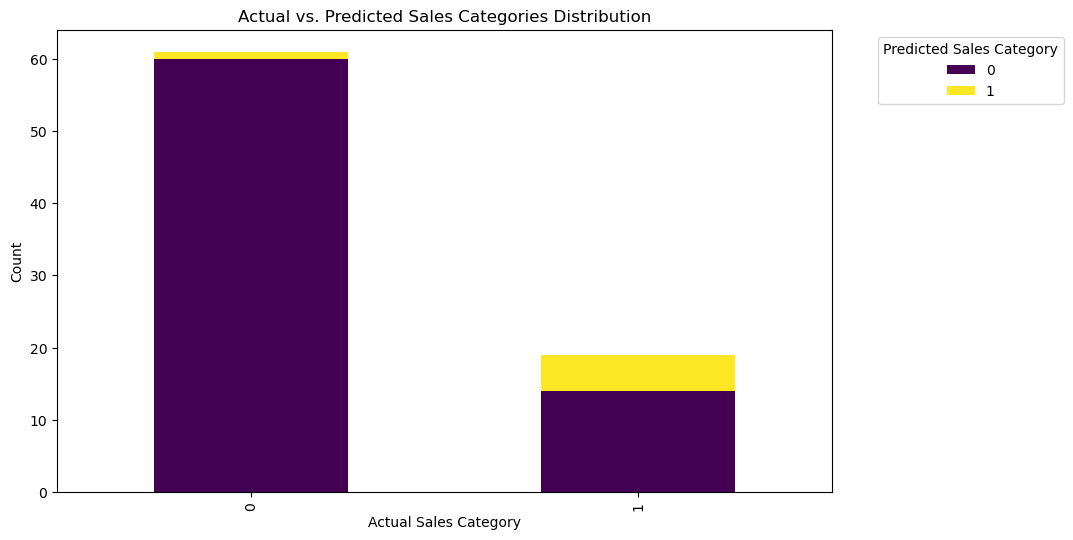

In [24]:
import seaborn as sns

# Create a DataFrame with actual and predicted sales categories
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Count the occurrences of each combination
result_counts = result_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)

# Plot a stacked bar chart
result_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.xlabel('Actual Sales Category')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Sales Categories Distribution')
plt.legend(title='Predicted Sales Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
